#**Fall 2022 Data Science Intern Challenge**


##Question 1: 
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [2]:
df.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
AOV=df['order_amount'].sum() / len(df)
AOV

3145.128

Text(0, 0.5, 'Order Amount')

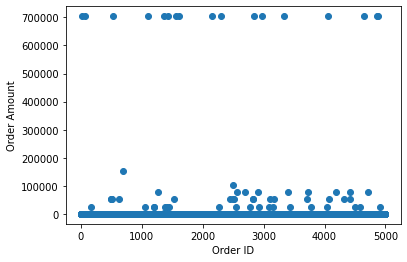

In [8]:
plt.scatter(df['order_id'], df['order_amount'])
plt.xlabel('Order ID')
plt.ylabel('Order Amount')

In [9]:
df1=df.groupby("user_id", as_index=False)[["total_items", "order_amount"]].sum()
df1['avg_order'] = df1['order_amount']/ df1['total_items']
df1.sort_values(['avg_order'], ascending=False).head()

,user_id,total_items,order_amount,avg_order
179,878,24,156936,6539.000000
67,766,23,80076,3481.565217
263,962,24,80408,3350.333333
156,855,27,80915,2996.851852
76,775,28,81114,2896.928571


In [10]:
df2=df.groupby("shop_id", as_index=False)[["order_amount", "total_items"]].sum()
df2['avg_order'] = df2['order_amount'] / df2['total_items']
df2.sort_values(['avg_order'], ascending=False).head()

,shop_id,order_amount,total_items,avg_order
77,78,2263800,88,25725.0
41,42,11990176,34063,352.0
11,12,18693,93,201.0
88,89,23128,118,196.0
98,99,18330,94,195.0


The Average Order value can be derived for two different types of order.

1. Business to Business 
2. Business to Customer 


##What could be going wrong with our calculation.
The AOV metric $3145.13 in the question was calculated by dividing the total revenue (order_amount) with number of orders.

Here, the first case, Business to Business is used on a data which has huge outliers.

But the catch here is, each record depicts the order placed by each individual user and not for each product (sneakers). Therefore, the AOV we calculated is obtained for number of orders and not number of sneakers.

##What metric would you report for this dataset

The correct metric to be used is Median.

Below is the corrected calculation with the correct metric to be used, i.e; Median. Sum of order amount divided by total number of items.

In [6]:
Average_Price = df['order_amount'].sum() / df['total_items'].sum()
Average_Price

357.92152221412965


##Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?

##How many orders were shipped by Speedy Express in total?

CREATE VIEW orders_by_speedy_express AS

SELECT O.OrderID, O.ShipperID, S.ShipperName

FROM Orders AS O

INNER JOIN Shippers AS S

ON S.ShipperID=O.ShipperID;

SELECT COUNT(*) FROM [orders_by_speedy_express]

WHERE ShipperName = 'Speedy Express';

###Answer= 54

##What is the last name of the employee with the most orders?

SELECT E.LastName, COUNT(O.OrderID) AS no_of_orders 

FROM Orders AS O

LEFT JOIN Employees AS E 

ON O.EmployeeID = E.EmployeeID

GROUP BY LastName ORDER BY no_of_orders DESC

LIMIT 1;

###Answer= 'Peacock', 40 orders

##What product was ordered the most by customers in Germany?


SELECT P.ProductID, P.ProductName,sum(OD.Quantity) AS Quantity

FROM Products as P

INNER JOIN OrderDetails as OD on OD.ProductID=P.ProductID

INNER JOIN Orders AS O on O.OrderID = OD.OrderID

INNER JOIN Customers as C on C.CustomerID = O.CustomerID

WHERE C.Country = 'Germany'

GROUP BY OD.ProductID 

ORDER BY Quantity DESC
LIMIT 1;

###Answer = Boston Crab Meat